### example 1

In [113]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [114]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [115]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a K-NN classifier with a specified number of neighbors (e.g., k=3)
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [116]:
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### example 2

In [117]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [118]:
# # Assuming you have user-item interaction data in the form of a user-item matrix
# user_item_matrix = np.array([[1, 0, 3, 4, 0],
#                              [0, 0, 2, 0, 0],
#                              [4, 0, 0, 1, 2],
#                              [3, 0, 4, 0, 0]])
# user_item_matrix

In [119]:
user_item_matrix = np.random.randint(5, size=(12, 5))

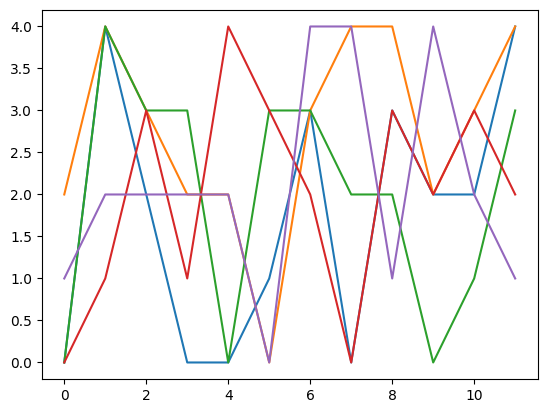

In [120]:
import matplotlib.pyplot as plt

plt.plot(user_item_matrix)
plt.show()


In [121]:
# Create a NearestNeighbors model (user-based)
knn_model = NearestNeighbors(n_neighbors=2, metric='cosine', algorithm='brute')
knn_model.fit(user_item_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=2)

In [122]:
# Make recommendations for a user (e.g., user 0)
user_index = 0
distances, indices = knn_model.kneighbors([user_item_matrix[user_index]], n_neighbors=3)
indices[0]

array([ 0,  7, 10])

In [123]:
# Recommend items based on similar users
recommended_items = user_item_matrix[indices[0]]
recommended_items

array([[0, 2, 0, 0, 1],
       [0, 4, 2, 0, 4],
       [2, 3, 1, 3, 2]])

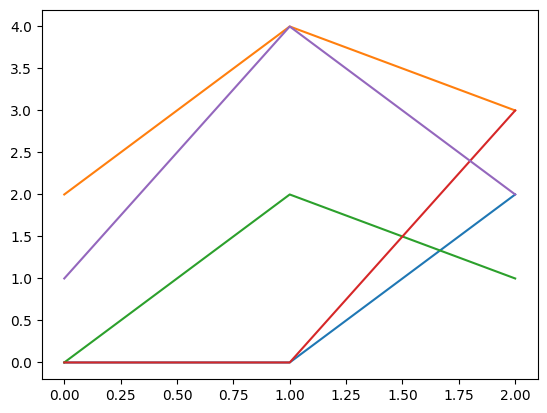

In [124]:
plt.plot(recommended_items)
plt.show()

### example 3

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [126]:
from random import randint, uniform


def get_int_random_number(min_=0, max_=89):
    return randint(min_, max_)

In [127]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=get_int_random_number())

In [128]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [129]:
y_test

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0,
       1, 1, 0, 0, 2, 2, 2, 1])

In [130]:
n_components = get_int_random_number(1, 3)
n_components

3

In [131]:
# Define the individual steps as tuples (name, estimator)
steps = [
    ('scaler', StandardScaler()),   # Standardize features
    ('pca', PCA(n_components=n_components)),  # Apply PCA for dimensionality reduction
    ('svm', SVC(kernel='rbf'))     # Support Vector Machine classifier
]

# Create a pipeline by passing the steps
pipeline = Pipeline(steps)

# Fit the pipeline to the data and make predictions
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=3)),
                ('svm', SVC())])

In [132]:
y_pred = pipeline.predict(X_test)
y_pred.shape

(30,)

In [133]:
y_pred

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0,
       1, 1, 0, 0, 2, 2, 2, 1])

### example 4

In [134]:
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Create a NearestNeighbors model with a specified distance metric (Euclidean)
k = 3
nn_model = NearestNeighbors(n_neighbors=k, metric='euclidean')

# Fit the model to the data
nn_model.fit(X)

NearestNeighbors(metric='euclidean', n_neighbors=3)

In [135]:
# Define a query point for which we want to find the nearest neighbors
query_point = [5.1, 3.5, 1.4, 0.2]

# Find the k-nearest neighbors of the query point
distances, indices = nn_model.kneighbors([query_point])

# Print the indices of nearest neighbors and their distances
print("Indices of Nearest Neighbors:", indices)
print("Distances to Nearest Neighbors:", distances)

Indices of Nearest Neighbors: [[ 0 17  4]]
Distances to Nearest Neighbors: [[0.         0.1        0.14142136]]


### example 5

In [162]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7],           # Different values of k
    'metric': ['euclidean', 'manhattan']  # Different distance metrics
}

In [163]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=get_int_random_number())

In [164]:
# Create a K-NN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7]})

In [165]:
# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']
best_k

7

In [166]:
best_metric = grid_search.best_params_['metric']
best_metric

'euclidean'

In [167]:
# Create a K-NN classifier with the best hyperparameters
final_knn_classifier = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)

# Fit the final model to the entire training dataset
final_knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [168]:
# Make predictions using the final model
y_pred = final_knn_classifier.predict(X_test)

# Evaluate the final model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [169]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### example 6

In [170]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [171]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=get_int_random_number())

In [172]:
# Create a K-NN classifier with a specified number of neighbors (e.g., k=3)
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [173]:
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

